<a href="https://colab.research.google.com/github/Asrarullah7/NLP-Structured-Data-Assignment/blob/main/Problem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 3**

A drug is generally administered to a patient in certain patterns or in regular intervals of time.

   **For example Chemotherapy which is drug treatment in case of Cancer is generally given to patients in an interval 3-4 weeks, i.e.**
   **Every 3-4 weeks patients are administered with the drug.**

Similarly to Chemotherapy, “Target Drug” is also administered/prescribed in certain patterns, we want to analyse in what patterns “Target Drug“ is administered/prescribed to patients, there might be multiple patterns in which “Target Drug” is administered/prescribed, come up with an analysis which to extract the dominant patterns in the data using clustering or other unsupervised techniques.

Visualise the prescription patterns with time on X-axis (month) and prescriptions on Y-axis for each of the patterns you are able to extract(Below is an example of a prescription pattern, where a prescription is made at least once in the first two months followed by one prescription for every two months).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight') #https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
pdf = pd.read_parquet('/content/test.parquet')

In [3]:
pdf

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0
...,...,...,...
1372854,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-05-11,DRUG_TYPE_13
1372856,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2018-08-22,DRUG_TYPE_2
1372857,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-02-04,DRUG_TYPE_2
1372858,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-09-25,DRUG_TYPE_8


In [4]:
df = pdf.copy()

In [5]:
df.isna().sum()


Patient-Uid    0
Date           0
Incident       0
dtype: int64

In [6]:
df = df.drop_duplicates()


In [7]:
df.shape


(1053424, 3)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1053424 entries, 0 to 1372859
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Patient-Uid  1053424 non-null  object        
 1   Date         1053424 non-null  datetime64[ns]
 2   Incident     1053424 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 32.1+ MB


In [9]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [10]:
df

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0
...,...,...,...
1372854,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-05-11,DRUG_TYPE_13
1372856,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2018-08-22,DRUG_TYPE_2
1372857,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-02-04,DRUG_TYPE_2
1372858,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-09-25,DRUG_TYPE_8


In [11]:
# Split the 'Date' column into separate year, month, and day columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop the original 'Date' column if not needed
df.drop(columns='Date', inplace=True)

df

,Patient-Uid,Incident,Year,Month,Day
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,SYMPTOM_TYPE_0,2016,12,8
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,DRUG_TYPE_0,2018,10,17
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,DRUG_TYPE_2,2017,12,1
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,DRUG_TYPE_1,2018,12,5
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,SYMPTOM_TYPE_0,2017,11,4
...,...,...,...,...,...
1372854,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,DRUG_TYPE_13,2017,5,11
1372856,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,DRUG_TYPE_2,2018,8,22
1372857,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,DRUG_TYPE_2,2017,2,4
1372858,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,DRUG_TYPE_8,2017,9,25


In [12]:
df1 = pd.concat([df, pd.get_dummies(df['Incident'])], axis=1)


In [13]:
df1.head()


,Patient-Uid,Incident,Year,Month,Day,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,...,SYMPTOM_TYPE_6,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,SYMPTOM_TYPE_0,2016,12,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,DRUG_TYPE_0,2018,10,17,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,DRUG_TYPE_2,2017,12,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,DRUG_TYPE_1,2018,12,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,SYMPTOM_TYPE_0,2017,11,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
dfs = df1.drop(['Patient-Uid', 'Incident'], axis=1)
dfs.head()

,Year,Month,Day,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,...,SYMPTOM_TYPE_6,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
0,2016,12,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018,10,17,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018,12,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,11,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df1.columns


Index(['Patient-Uid', 'Incident', 'Year', 'Month', 'Day', 'DRUG_TYPE_0',
       'DRUG_TYPE_1', 'DRUG_TYPE_10', 'DRUG_TYPE_11', 'DRUG_TYPE_12',
       'DRUG_TYPE_13', 'DRUG_TYPE_14', 'DRUG_TYPE_15', 'DRUG_TYPE_16',
       'DRUG_TYPE_17', 'DRUG_TYPE_2', 'DRUG_TYPE_3', 'DRUG_TYPE_4',
       'DRUG_TYPE_5', 'DRUG_TYPE_6', 'DRUG_TYPE_7', 'DRUG_TYPE_8',
       'DRUG_TYPE_9', 'PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0', 'SYMPTOM_TYPE_1',
       'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_11', 'SYMPTOM_TYPE_12',
       'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_15',
       'SYMPTOM_TYPE_16', 'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_18',
       'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_2', 'SYMPTOM_TYPE_20',
       'SYMPTOM_TYPE_21', 'SYMPTOM_TYPE_22', 'SYMPTOM_TYPE_23',
       'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_25', 'SYMPTOM_TYPE_26',
       'SYMPTOM_TYPE_27', 'SYMPTOM_TYPE_28', 'SYMPTOM_TYPE_29',
       'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_4', 'SYMPTOM_TYPE_5', 'SYMPTOM_TYPE_6',
       'SYMPTOM_TYPE_7', 'SYMPTOM_TYPE_8', 'SY

In [16]:
# plt.boxplot(data=df1, x='Patient-Uid')


In [17]:
ss = StandardScaler()

x_std = ss.fit_transform(df1.drop(['Patient-Uid', 'Incident'], axis=1))
x_std

array([[-0.86314311,  1.62966652, -0.87639932, ..., -0.05077642,
        -0.01892112, -0.00616221],
       [ 0.6070774 ,  1.04241525,  0.15272343, ..., -0.05077642,
        -0.01892112, -0.00616221],
       [-0.12803286,  1.62966652, -1.67682812, ..., -0.05077642,
        -0.01892112, -0.00616221],
       ...,
       [-0.12803286, -1.3065898 , -1.3337872 , ..., -0.05077642,
        -0.01892112, -0.00616221],
       [-0.12803286,  0.74878962,  1.06749921, ..., -0.05077642,
        -0.01892112, -0.00616221],
       [-0.12803286, -0.4257129 ,  0.38141738, ..., -0.05077642,
        -0.01892112, -0.00616221]])

In [18]:
km = KMeans(n_clusters=2)
km.fit(x_std)

KMeans(n_clusters=2)

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.**
**On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org**

In [19]:
centeroids = km.cluster_centers_
centeroids

array([[-3.55270339e-03, -2.31168968e-04, -4.24358654e-04,
         4.40677165e-02,  6.27752222e-02, -6.35857673e-02,
         1.81579856e-02,  7.44175764e-03,  8.92863821e-03,
         9.87722586e-03,  5.18627880e-03,  2.88076433e-03,
        -2.75578314e-03,  4.40023005e-02,  2.87722661e-02,
         6.00517841e-03,  1.99945761e-02,  6.69987595e-02,
         4.39911256e-02,  3.39191461e-02,  2.25176844e-02,
        -3.71900602e-01,  1.85461624e-02,  7.61423208e-03,
         5.91127147e-03,  3.89787819e-03,  4.27893816e-03,
         3.22399329e-03,  6.97670728e-03,  5.96910749e-03,
         5.55700262e-03,  3.73881279e-03,  1.79140225e-03,
         1.17030978e-03,  7.37405130e-03,  7.26816589e-04,
         1.46708880e-03,  1.49352780e-03,  6.40990155e-04,
         9.48693187e-04,  2.79748781e-04,  6.09702675e-04,
         3.95625272e-04,  4.42322921e-04,  5.76671379e-03,
         4.35386233e-03,  5.07541427e-03,  1.03079304e-02,
         1.51062300e-02,  1.25133386e-02,  7.25439977e-0

In [20]:
km.labels_


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [21]:
km.inertia_


59906307.60214362

In [22]:
inertias = []
lists_k = list(range(1, 11))

for k in lists_k:
  km1 = KMeans(n_clusters = k)
  km1.fit(x_std)
  cluster_labels = km1.predict(x_std)
  inertias.append(km1.inertia_)

Text(0, 0.5, 'Inertia')

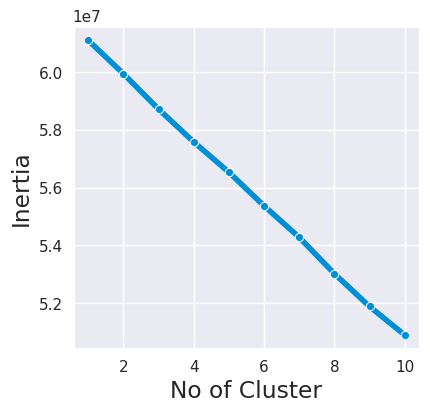

In [23]:
sns.set_style('darkgrid')
plt.figure(figsize=(4,4))
sns.lineplot(x=lists_k, y=inertias, marker='o')
plt.xlabel('No of Cluster')
plt.ylabel('Inertia')
#plt.show

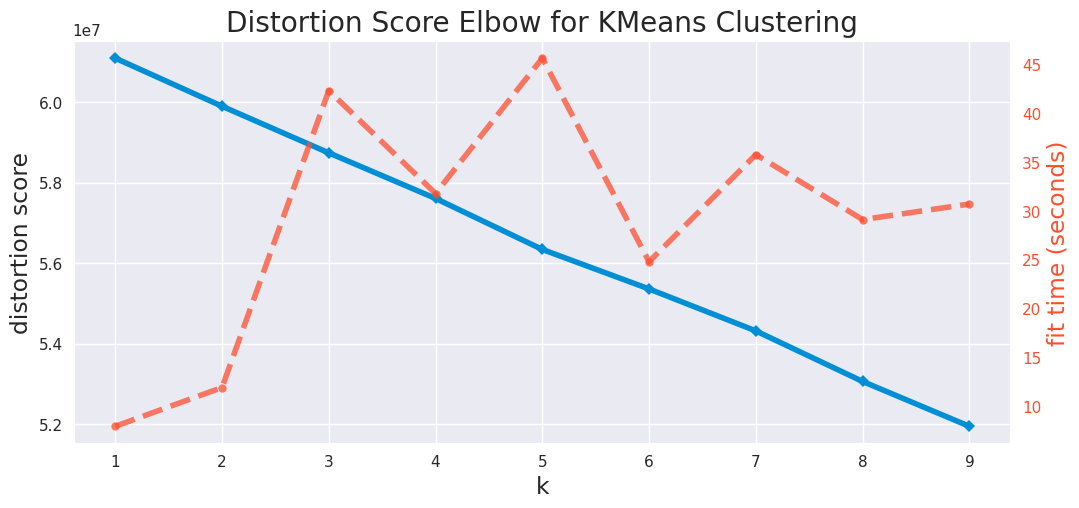

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
visualizer1 = KElbowVisualizer(km1, k=(1,10),size=(1080, 500))

visualizer1.fit(x_std)        # Fit the data to the visualizer
visualizer1.show()

**Another methods**

In [25]:
# Filter data for patients who have taken the "Target Drug" at least once
target_drug_data = df1[df1['Incident'] == 'TARGET DRUG']

In [26]:
# # Create a feature matrix with patient prescriptions in each month
# target_drug_data['Month'] = target_drug_data['Date'].dt.to_period('M')
feature_matrix = df1.pivot_table(index='Patient-Uid', columns='Month', values='Incident', aggfunc='size', fill_value=0)


In [27]:
# Apply K-means clustering to identify prescription patterns
n_clusters = range(2, 10)  # Try different number of clusters
cluster_scores = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(feature_matrix)
    cluster_score = silhouette_score(feature_matrix, cluster_labels)
    cluster_scores.append(cluster_score)

print(cluster_scores)

[0.4857878325749402, 0.3459329368523544, 0.23332531651953894, 0.17631373848462334, 0.15071569422563375, 0.1040675292203424, 0.09716463384615635, 0.08925711432903226]


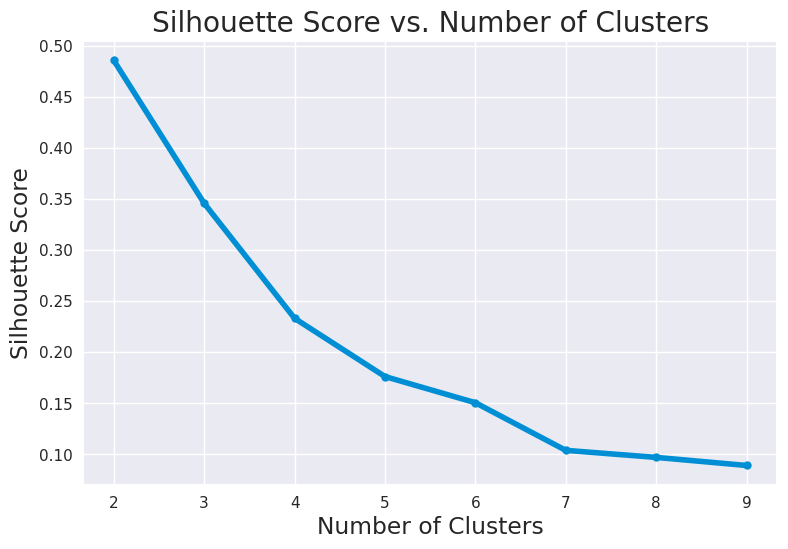

In [28]:
# Determine the optimal number of clusters using the elbow method
plt.plot(n_clusters, cluster_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.xticks(n_clusters)
plt.show()

In [29]:
pca = PCA(n_components=2)

df3 = pd.DataFrame(pca.fit_transform(feature_matrix), columns=['PCA1', 'PCA2'])
df3

,PCA1,PCA2
0,-12.608195,-6.701797
1,10.771202,2.337343
2,-0.264476,-0.787946
3,5.945629,7.260891
4,-7.130944,-1.366883
...,...,...
11477,-4.603623,-0.848861
11478,-18.002715,4.905965
11479,-1.157607,1.466852
11480,-16.193975,-6.016350


In [30]:
df3.columns


Index(['PCA1', 'PCA2'], dtype='object')

In [31]:
a1 = km1.cluster_centers_


In [32]:
reduce_centers = pca.fit_transform(a1)
reduce_centers

array([[-1.49979546, -1.56120302],
       [-1.48939865, -1.53289663],
       [-3.52429238,  9.86416644],
       [-1.57228905, -1.73299479],
       [-1.49838829, -1.61513489],
       [-1.52723485, -1.61131253],
       [-1.45701304, -1.4710383 ],
       [14.10015077,  1.27114683],
       [-1.53173904, -1.6107331 ]])

In [33]:
df3['Cluster Labels'] = cluster_labels
df3

,PCA1,PCA2,Cluster Labels
0,-12.608195,-6.701797,3
1,10.771202,2.337343,4
2,-0.264476,-0.787946,6
3,5.945629,7.260891,4
4,-7.130944,-1.366883,6
...,...,...,...
11477,-4.603623,-0.848861,6
11478,-18.002715,4.905965,3
11479,-1.157607,1.466852,6
11480,-16.193975,-6.016350,3


**Visualize the Cluster Data**

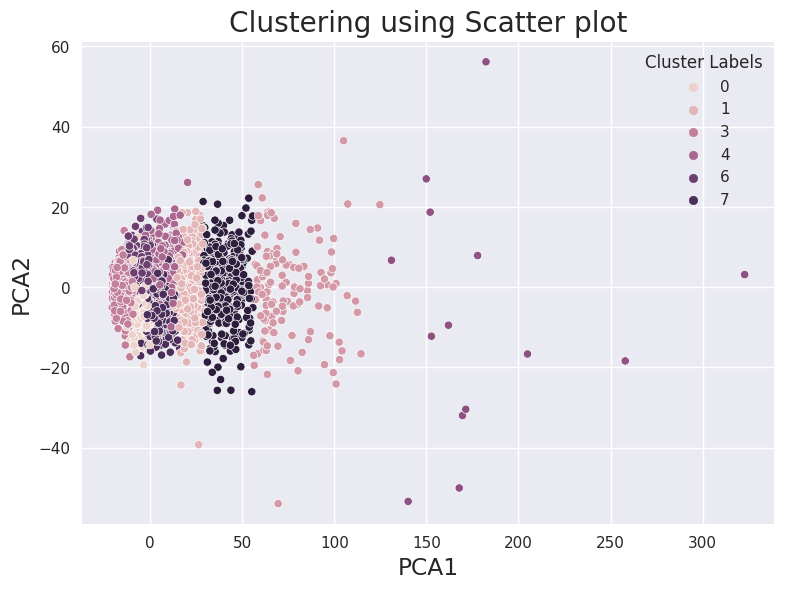

In [34]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.scatterplot(data=df3, x='PCA1', y='PCA2', hue='Cluster Labels')
#plt.scatter(reduce_centers[:,0],reduce_centers[:,1], marker='x',s=300)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clustering using Scatter plot')
plt.show()


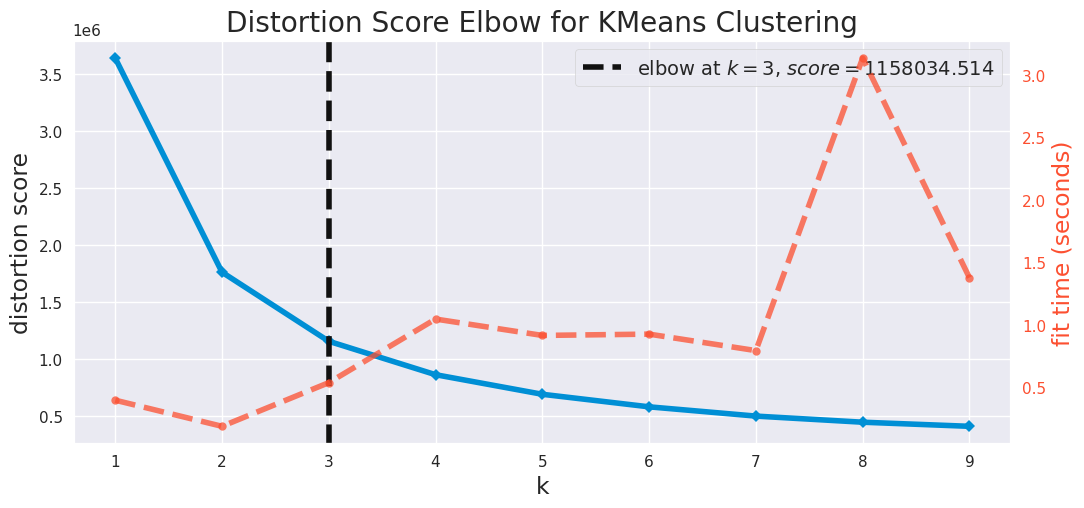

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10),size=(1080, 500))

visualizer.fit(df3.iloc[:,:3])        # Fit the data to the visualizer
visualizer.show()

In [36]:
print('Silhoette Score: ', silhouette_score(df3, model.labels_, metric='euclidean'))


Silhoette Score:  0.3487265474567875


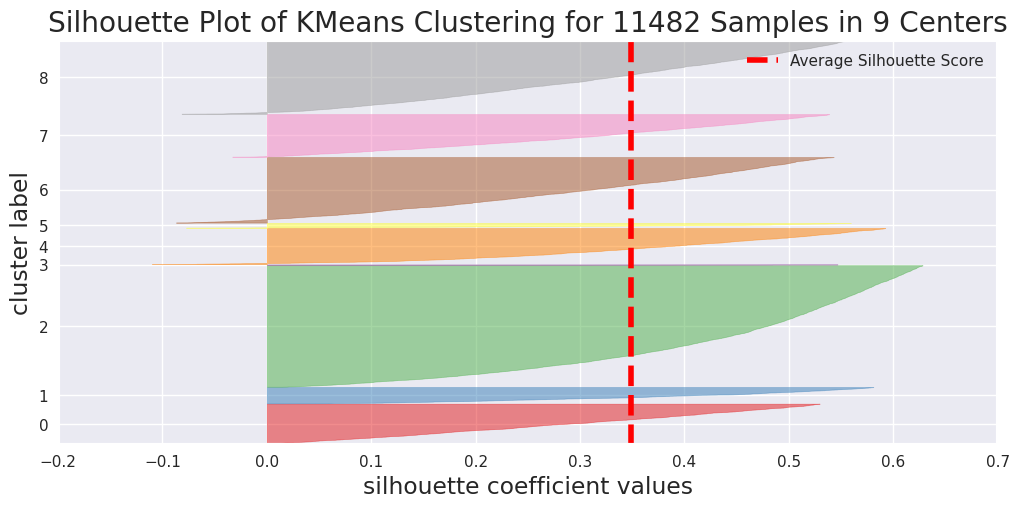

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 11482 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
visual = SilhouetteVisualizer(model, size= (1080, 500))
visual.fit(df3)
visual.show()

**Create an empty list to store the individual series**

In [38]:
df.columns[2:]


Index(['Year', 'Month', 'Day'], dtype='object')

In [39]:
df1.columns


Index(['Patient-Uid', 'Incident', 'Year', 'Month', 'Day', 'DRUG_TYPE_0',
       'DRUG_TYPE_1', 'DRUG_TYPE_10', 'DRUG_TYPE_11', 'DRUG_TYPE_12',
       'DRUG_TYPE_13', 'DRUG_TYPE_14', 'DRUG_TYPE_15', 'DRUG_TYPE_16',
       'DRUG_TYPE_17', 'DRUG_TYPE_2', 'DRUG_TYPE_3', 'DRUG_TYPE_4',
       'DRUG_TYPE_5', 'DRUG_TYPE_6', 'DRUG_TYPE_7', 'DRUG_TYPE_8',
       'DRUG_TYPE_9', 'PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0', 'SYMPTOM_TYPE_1',
       'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_11', 'SYMPTOM_TYPE_12',
       'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_15',
       'SYMPTOM_TYPE_16', 'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_18',
       'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_2', 'SYMPTOM_TYPE_20',
       'SYMPTOM_TYPE_21', 'SYMPTOM_TYPE_22', 'SYMPTOM_TYPE_23',
       'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_25', 'SYMPTOM_TYPE_26',
       'SYMPTOM_TYPE_27', 'SYMPTOM_TYPE_28', 'SYMPTOM_TYPE_29',
       'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_4', 'SYMPTOM_TYPE_5', 'SYMPTOM_TYPE_6',
       'SYMPTOM_TYPE_7', 'SYMPTOM_TYPE_8', 'SY

In [40]:
len(df1.columns[2:])


58

In [41]:
df.columns

Index(['Patient-Uid', 'Incident', 'Year', 'Month', 'Day'], dtype='object')

**Patient-Uid  Incident  Year  Month Day**

In [42]:
# Create a pivot table to count the number of incidents for each patient and month
pivot_df = pd.pivot_table(df, index = 'Patient-Uid', columns='Month',aggfunc='size', fill_value=0)


# Convert pivot table to numpy array
X = pivot_df.to_numpy()
# Normalize matrix by row
norm = pivot_df.div(pivot_df.sum(axis=1), axis=0)


# K-means clustering model generating
kmeans = KMeans(n_clusters=4)
cluster = kmeans.fit_predict(norm)

In [43]:
# Create an empty list to store the individual series
s = []

# Iterate through the range of columns
for i in range(0, len(pivot_df.columns) - 1):
    # Calculate the average of two sequential columns
    a = (pivot_df.iloc[:, i] + pivot_df.iloc[:, i+1]) / 2
    s.append(a)

# Combine the series into a single DataFrame
combined_df = pd.concat(s, axis=1)

In [44]:
combined_df


,0,1,2,3,4,5,6,7,8,9,10
Patient-Uid,,,,,,,,,,,
a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,1.0,0.5,1.0,3.0,4.0,2.5,1.0,1.5,3.5,5.0,13.5
a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,9.5,11.0,11.0,11.0,14.5,14.5,10.0,8.0,10.0,9.5,9.5
a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,2.5,6.0,9.0,5.0,5.5,8.5,9.5,9.5,10.0,8.0,9.0
a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,8.5,7.0,8.5,10.0,16.0,15.0,9.5,8.5,7.5,8.5,6.0
a0f9eab1-1c7c-11ec-a732-16262ee38c7f,4.0,3.5,5.0,6.0,6.0,4.0,4.5,4.5,8.0,9.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
a102720c-1c7c-11ec-bd9a-16262ee38c7f,4.0,8.5,8.5,4.5,5.0,8.5,8.5,4.5,4.5,7.0,7.5
a102723c-1c7c-11ec-9f80-16262ee38c7f,1.5,0.5,2.0,3.5,6.5,5.5,2.5,2.5,1.5,0.5,0.5
a102726b-1c7c-11ec-bfbf-16262ee38c7f,6.5,5.5,6.0,9.0,8.5,7.0,9.5,7.5,6.0,6.0,7.0


<Axes: xlabel='months', ylabel='Average prescription'>

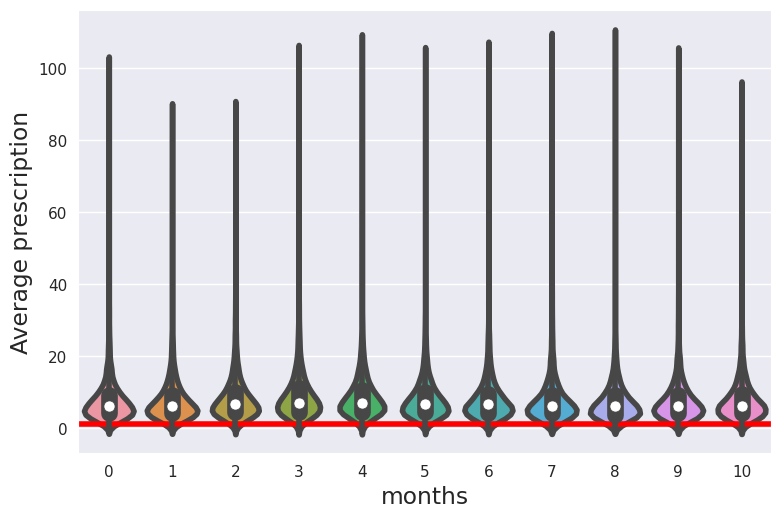

In [46]:
# Plot the violin plot
plt.axhline(y=1, color='red', linestyle='-')
plt.xlabel("months")
plt.ylabel("Average prescription")
sns.violinplot( data=combined_df)